In [1]:
# List of Imports and Confs
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import pandana as pdna
import geopandas as gpd
from pandana.loaders import osm
from shapely.geometry import Point, Polygon
import urllib.parse

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
ilhavo = gpd.read_file('./data/Subseccao_ilhavo_wgs84/Ilhavo_wgs84_subseccao.shp')
ilhavoBounds = ilhavo.total_bounds
boundaryIlhavo = ilhavo.dissolve(by='Municipio')

In [3]:
# Creating Network from bbox

bbox = [ilhavoBounds[1], ilhavoBounds[0], ilhavoBounds[3], ilhavoBounds[2]]
network = osm.pdna_network_from_bbox(*bbox, network_type='walk', two_way=True)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](40.56244201,-8.76608888,40.65985506,-8.61809542);>;);out;'}"
Downloaded 4,052.7KB from www.overpass-api.de in 0.64 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 0.80 seconds
Returning OSM data with 28,638 nodes and 5,417 ways...
Edge node pairs completed. Took 19.17 seconds
Returning processed graph with 6,725 nodes and 9,577 edges...
Completed OSM data download and Pandana node and edge table creation in 21.26 seconds


In [6]:
network.edges_df

from          to    distance
26019656   1650473977    26019656  1650473977  202.986370
132887998  624272810    132887998   624272810  101.755323
           1650269783   132887998  1650269783    9.057816
267983421  3603994746   267983421  3603994746    2.749155
           3603994747   267983421  3603994747    2.784190
267983422  3603994769   267983422  3603994769    2.825462
267983429  1214724417   267983429  1214724417   40.890244
           1214724466   267983429  1214724466    6.775382
267983444  3596762941   267983444  3596762941   39.123814
330341298  1484655920   330341298  1484655920   98.438125
330341301  330341302    330341301   330341302  111.453785
           1484930831   330341301  1484930831   72.416663
330341302  698090406    330341302   698090406   72.997553
           5217907851   330341302  5217907851   16.967822
330341303  1406433057   330341303  1406433057   12.836285
           1650941224   330341303  1650941224   34.832800
330341306  390280425    330341306   390280425   32.642863
           1489699007   330341306  1489699007   20.888536
330341308  330341607    330341308   330341607   17.629947
330341455  1110673533   330341455  1110673533  250.459604
330341607  385009969    330341607   385009969   39.925288
           1650541330   330341607  1650541330   30.550653
336969772  1389972317   336969772  1389972317  184.059366
336969815  336969817    336969815   336969817   44.658946
336969817  1491747909   336969817  1491747909   77.714532
336969863  1491747907   336969863  1491747907    7.559998
           1714381893   336969863  1714381893   99.183856
336969872  1714382263   336969872  1714382263   20.703671
           1714382466   336969872  1714382466   19.621738
336969881  1389972370   336969881  1389972370   51.521636
...                           ...         ...         ...
6516319872 1712837076  6516319872  1712837076    2.800473
6528345820 1799588479  6528345820  1799588479    2.229418
6528345828 1487365116  6528345828  1487365116   18.738834
6528345834 6528345837  6528345834  6528345837    7.662047
6528345837 1799588476  6528345837  1799588476    9.316184
6528345841 1799588476  6528345841  1799588476    6.942229
6528345856 6528345857  6528345856  6528345857   10.634852
6528345857 1487365114  6528345857  1487365114   29.556861
6528345858 6126298551  6528345858  6126298551    9.885882
6528345859 5203859425  6528345859  5203859425    4.705601
           6528345858  6528345859  6528345858   19.053689
6528345860 1799573029  6528345860  1799573029    6.610005
6551591420 1578681794  6551591420  1578681794   40.272320
6568833858 1419029814  6568833858  1419029814  259.107092
6594368667 4311250118  6594368667  4311250118   40.060246
6594398685 5237860017  6594398685  5237860017   46.097732
6594600914 1489609743  6594600914  1489609743   60.043618
           1489609754  6594600914  1489609754   42.575480
6594600923 1489609741  6594600923  1489609741    4.135712
6594600924 6594600925  6594600924  6594600925    9.660275
6594600926 6594600923  6594600926  6594600923    9.566556
6594600942 2940767472  6594600942  2940767472   27.891625
           6594600943  6594600942  6594600943   13.059730
6594600943 2940767472  6594600943  2940767472   29.618200
           4100711060  6594600943  4100711060   15.277943
6594764804 1443502761  6594764804  1443502761    8.952826
6594764805 1489609696  6594764805  1489609696   23.953440
6600815875 1618867777  6600815875  1618867777   22.854430
           6600815876  6600815875  6600815876   17.294464
6600815876 1618868026  6600815876  1618868026   57.754203

[9729 rows x 3 columns]

In [5]:
teste = network.nodes_df
sLength = len(teste)

In [13]:
# Function to get the subsection of a Point
def verifySubSection(city, nodedf):
    cityBoundary = city.dissolve(by='Municipio')
    listOfIndex = []
    listOfSubSection = []

    for e in list(nodedf.index.tolist()):
        pointObj = Point(nodedf.loc[e].x,nodedf.loc[e].y)
        # Check if Point exists on city borders
        if(cityBoundary.geometry.contains(pointObj).iloc[0]):
            listOfIndex.append(e)
            for index in city.index:
                # Verify what is the subsection that contains that point
                if(city.iloc[index].geometry.contains(pointObj)):
                    listOfSubSection.append(city.iloc[index].BGRI11)
                
    result = pd.Series(data=listOfSubSection, index=listOfIndex)
    return result
            

In [14]:
check = verifySubSection(ilhavo, teste)

In [ ]:
teste = teste.assign(SubSection=check) 

In [16]:
# boundaryIlhavo.geometry.contains()
teste.head()

,x,y,SubSection
id,,,
26019656,-8.684921,40.632523,NaN
132887998,-8.725343,40.639438,01100300207
267983421,-8.746970,40.633751,01100200102
267983422,-8.745970,40.633788,01100200109
267983429,-8.746363,40.642880,01100300701


In [17]:
# Clear the Ilhavo Dataframe
ilhavo.index = ilhavo.BGRI11
# Acho que não é necessário retirar o BGRI das colunas. Ajuda na hora de plotar.
# ilhavo = ilhavo.drop('BGRI11', axis=1)

In [10]:
# Special Case for Schools
ilhavoSchools = gpd.read_file('data/ilhavoSchools/Educacao_1_ciclo_WGS84.shp')
# In this case, Transform data to WGS 84 without mercator
ilhavoSchools = ilhavoSchools.to_crs(epsg=4326)
xS, yS = ilhavoSchools.geometry.centroid.x, ilhavoSchools.geometry.centroid.y

In [11]:
# Health Services
ilhavoHealth = gpd.read_file('data/Saude_WGS84.json')
# Eliminate Farmacies from dataset
# ilhavoHealth = ilhavoHealth.to_crs(epsg=4326)
# ilhavoHealth = gpd.read_file('data/ilhavoHospital.geojson')
ilhavoHealth = ilhavoHealth[ilhavoHealth.DESC_PALAV != 'Farmácia']
xH, yH = ilhavoHealth.geometry.centroid.x, ilhavoHealth.geometry.centroid.y

In [12]:
# Food Amenities Load
ilhavoAmenities = gpd.read_file('data/ilhavoFoodAmenities.geojson')
xA, yA = ilhavoAmenities.geometry.centroid.x, ilhavoAmenities.geometry.centroid.y

In [13]:
limitValue = 2000
network.precompute(limitValue)
network.set_pois('school', limitValue, 10, xS, yS)
accessibilitySchool = network.nearest_pois(limitValue, 'school', num_pois=10)
network.set_pois('restaurant', limitValue, 10, xA, yA)
accessibilityFood = network.nearest_pois(limitValue, 'restaurant', num_pois=10)
network.set_pois('hospital', limitValue, 10, xH, yH)
accessibilityHealth= network.nearest_pois(limitValue, 'hospital', num_pois=10)

### Plot Distance to the N amenity

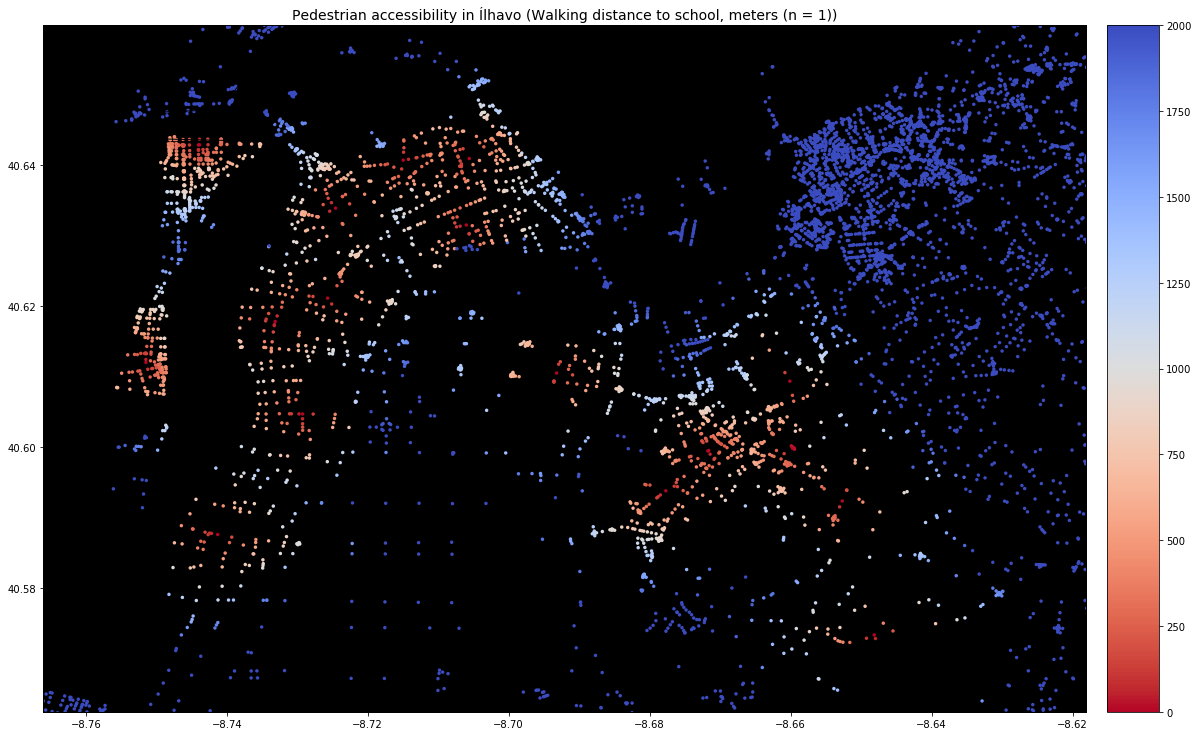

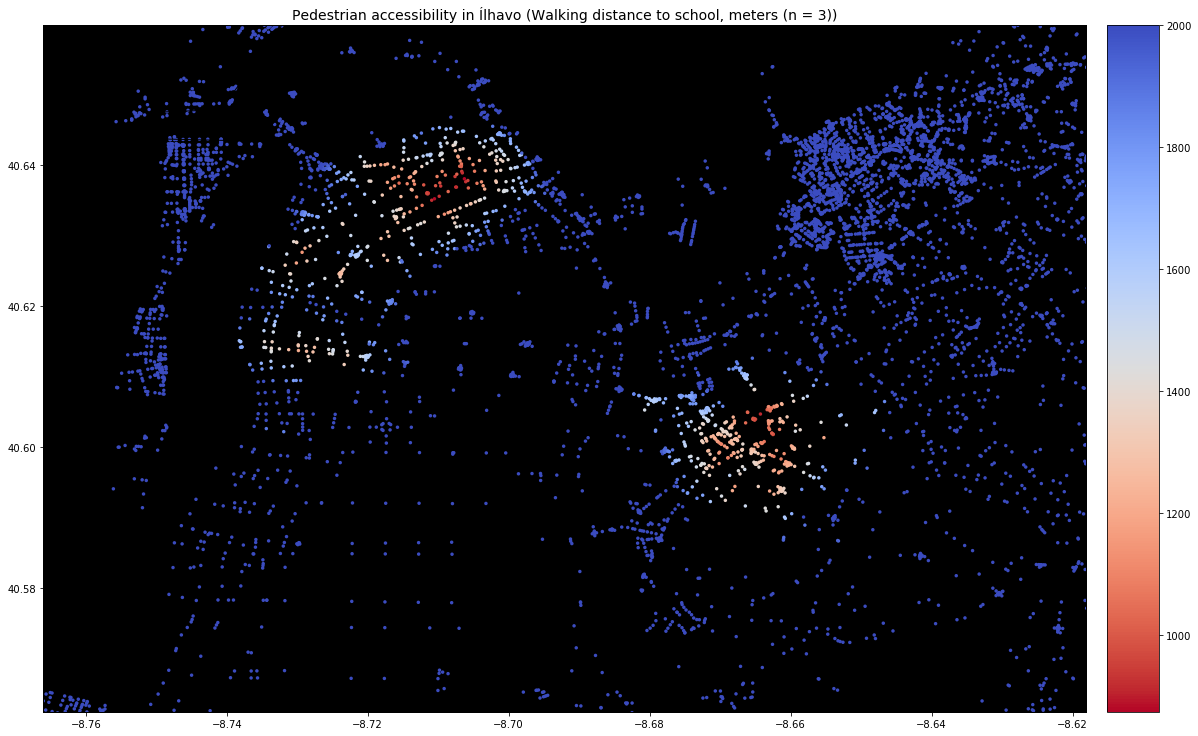

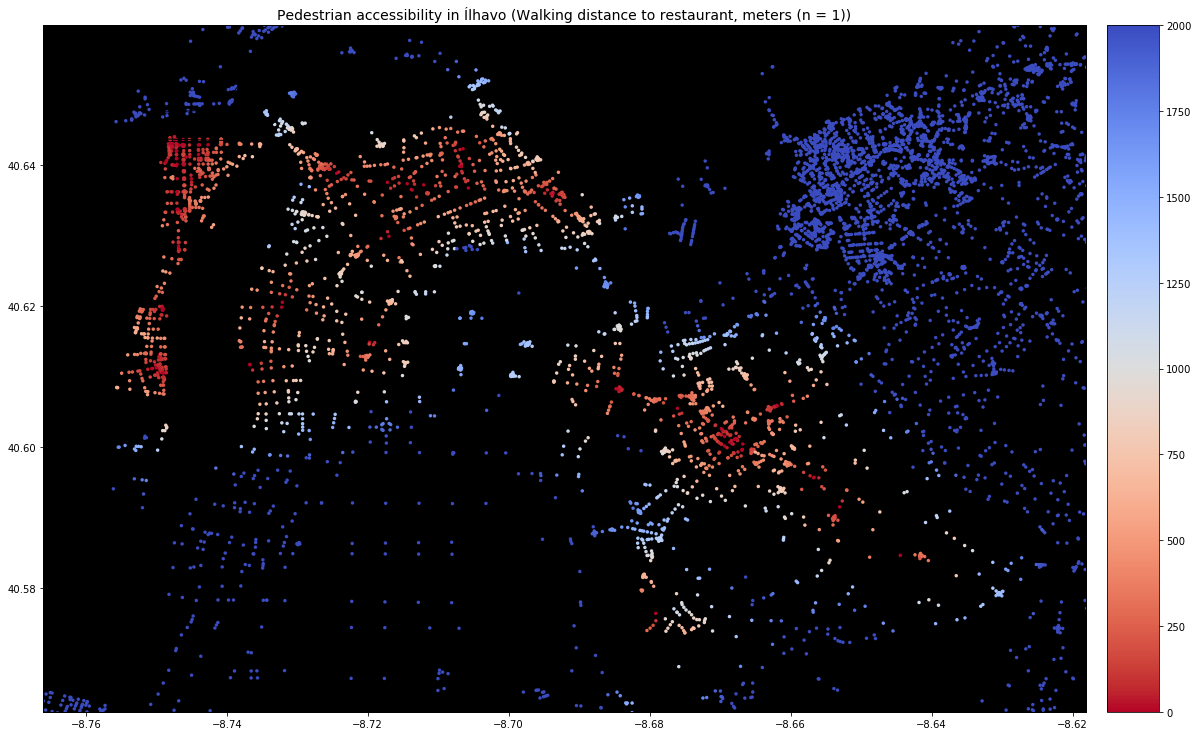

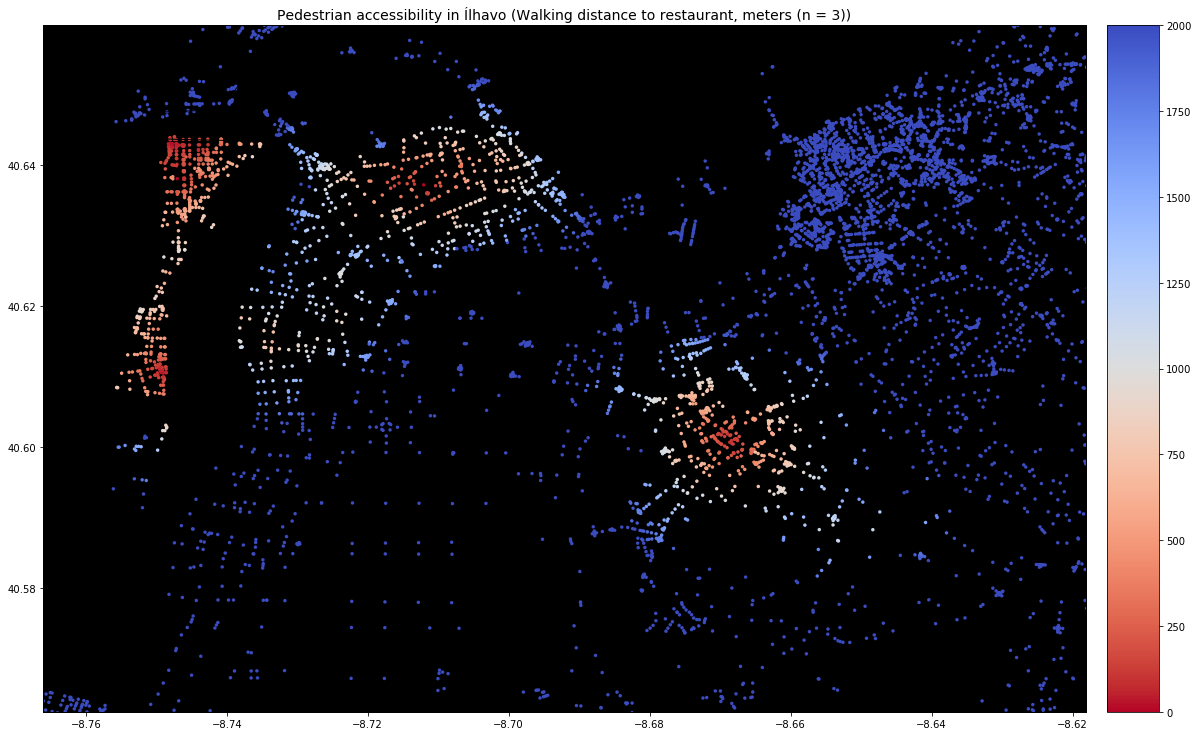

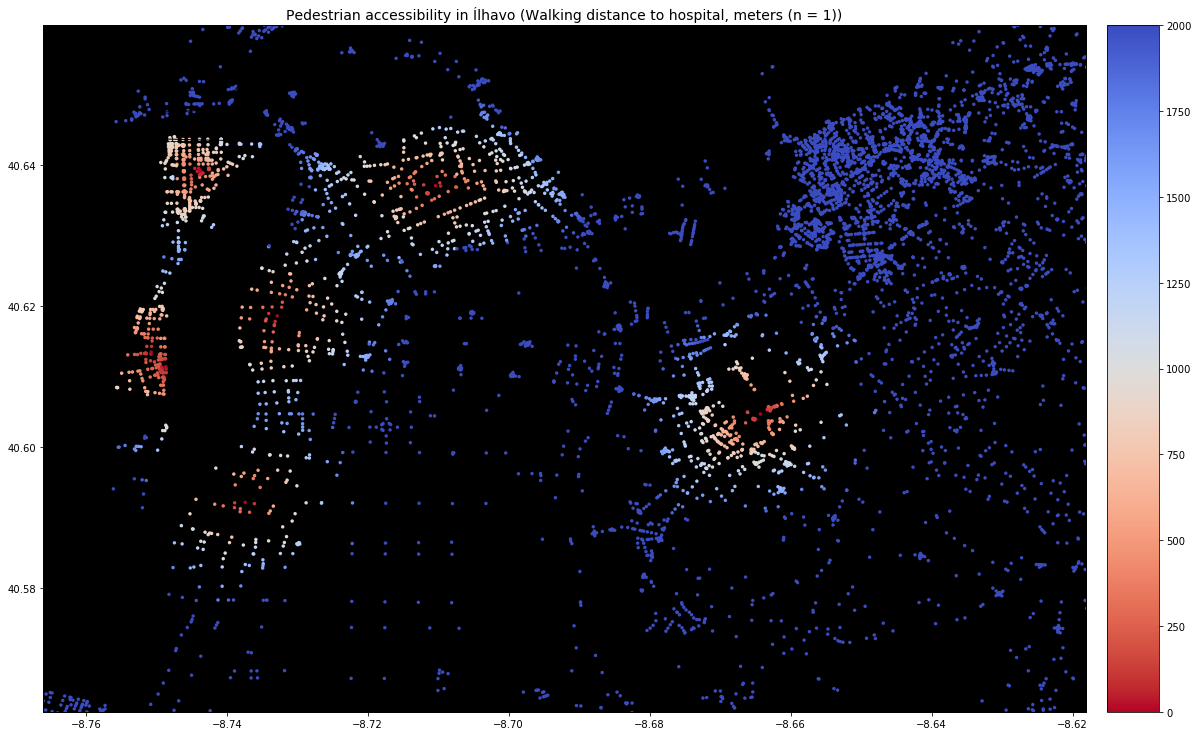

In [27]:
def plot_nearest_amenity(amenity,accessibility, n):
    fig_kwargs = {'figsize': [20, 20]}
    bmap_kwargs = {'suppress_ticks': False, 'resolution': 'h', 'epsg': '4326'}
    plot_kwargs = {'cmap': 'coolwarm_r', 's': 12, 'edgecolor': 'none'}
    bmap,fig, ax = network.plot(accessibility[n], bbox=bbox,
                               fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)
    ax.set_facecolor('k')
    ax.set_title('Pedestrian accessibility in Ílhavo (Walking distance to {}, meters (n = {}))'.format(amenity,n), fontsize=14);

plot_nearest_amenity('school',accessibilitySchool,1)
plot_nearest_amenity('school',accessibilitySchool,3)
plot_nearest_amenity('restaurant',accessibilityFood,1)
plot_nearest_amenity('restaurant',accessibilityFood,3)
plot_nearest_amenity('hospital',accessibilityHealth,1)


### Logic for Report Generation

In [15]:
def getQuantitativeData(geojsonDF, nodes_df, accessibility, columnNames=[]):
    # Para Cada Subseccao
    listOfIndex = []
    listOf1 = []
    listOf5 = []
    listOfMean = []
    for subsection in geojsonDF.index.tolist():
        nodesRelatedToSubSection = nodes_df.loc[nodes_df['SubSection']==subsection]
        # Para cada ponto dentro da SubSecao
        lowerDistance1 = []
        lowerDistance5 = []
        if(nodesRelatedToSubSection.size > 0):
            listOfIndex.append(subsection)
            for node in nodesRelatedToSubSection.index.tolist():
                # Distancia desse node a amenidade mais proxima
                lowerDistance1.append(accessibility.loc[node][1])
                # Distancia desse node a 5 amenidade
                lowerDistance5.append(accessibility.loc[node][3])
            listOf1.append(min(lowerDistance1))
            listOf5.append(np.mean(lowerDistance5))
            listOfMean.append(np.mean(lowerDistance1))
    nearestSerie = pd.Series(data=listOf1, index=listOfIndex)
    longestSerie = pd.Series(data=listOf5, index=listOfIndex)
    meanSerie = pd.Series(data=listOfMean, index=listOfIndex)
    dfDict = {columnNames[0]:nearestSerie, columnNames[1]:longestSerie, columnNames[2]:meanSerie}
    return pd.DataFrame(dfDict)

In [16]:
# Used to create a new collumn with the NUMBER OF POINTS PER SUBSECTION
tempDict = {}
for subsection in ilhavo.index.tolist():
    tempDict[subsection] = teste.loc[teste.SubSection==subsection].count(0).SubSection
ilhavo = ilhavo.assign(PointsPerSubSection=pd.Series(tempDict))

In [17]:
schoolData = getQuantitativeData(ilhavo, teste, accessibilitySchool, ['School_Nearest', 'School_3_Mean', 'School_Mean'])
foodData = getQuantitativeData(ilhavo, teste, accessibilityFood, ['Food_Nearest', 'Food_3_Mean', 'Food_Mean'])
healthData = getQuantitativeData(ilhavo, teste, accessibilityHealth, ['health_Nearest', 'health_3_Mean', 'health_Mean'])

In [18]:
ilhavo = ilhavo.join(schoolData)
ilhavo = ilhavo.join(foodData)
ilhavo = ilhavo.join(healthData)

In [19]:
ilhavo.to_excel('ilhavo_results.xlsx')

In [22]:
ilhavo.to_file('ilhavo_results', driver='ESRI Shapefile')